In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import polars as pl
from pathlib import Path
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import json
import os
import sys
from dotenv import load_dotenv
from dateutil.relativedelta import relativedelta
from datetime import datetime, date, timedelta
from typing import List
from fredapi import Fred
from tqdm import tqdm
from data_check_utils import calculate_missing_stats, extract_dates_in_range
from database_utils import (
        get_table_names,
        step1_load_file_to_db,
        step2_create_variable_tables,
        step3_create_return_table
    )
from data_prepare import createDB_bpm_and_factset_code
from concurrent.futures import ThreadPoolExecutor
from fred_database_utils import store_fred_database, get_fred_ids_from_file  # type: ignore
from us_treasury import (
        plot_us_interest_rates_and_spread,
        analyze_yield_curve_pca,
        plot_loadings_and_explained_variance,
        plot_us_interest_rates_and_spread_2
    )
import warnings
warnings.simplefilter("ignore")

FRED_API = os.getenv("FRED_API_KEY")


Q_DIR = Path().cwd().parent
DATA_DIR = Q_DIR / "data" / "MSCI_KOKUSAI"
PRJ_DIR = Q_DIR / "A_001"
# Factset Benchmark directory
BM_DIR = Q_DIR / "data/Factset/Benchmark"
FRED_DIR = Q_DIR / 'data' / 'FRED'
# FRED_DIR = Path().cwd().parents[2] / "FRED"
# print(f"FRED directory: {FRED_DIR}")


In [ ]:
db_path = FRED_DIR / "FRED.db"
id_list = get_fred_ids_from_file(file_path=FRED_DIR / "fred_series.json")
# display(id_list)
# store_fred_database(db_path=db_path, series_id_list=id_list, FRED_API=FRED_API)


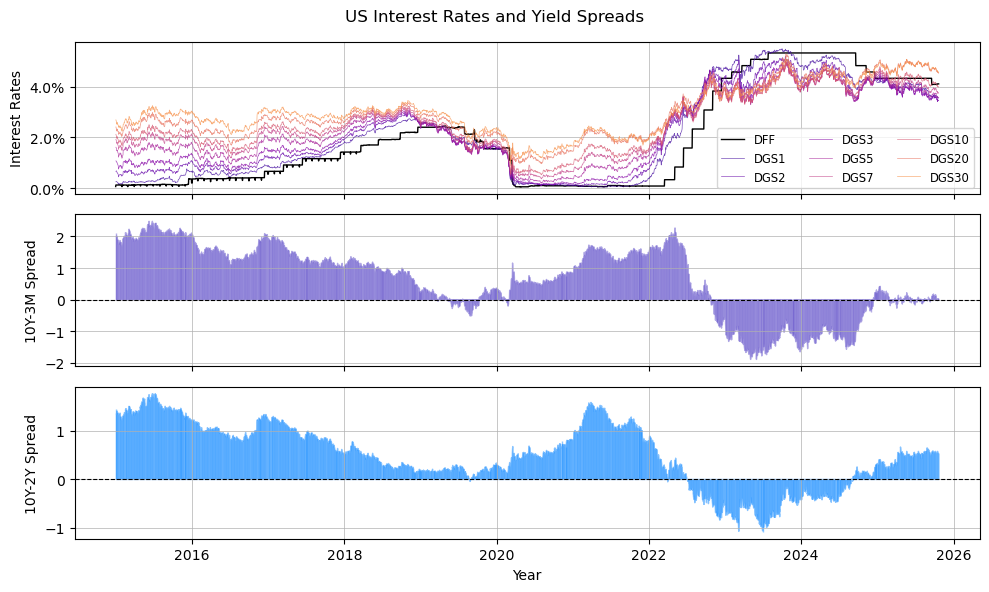

In [ ]:
plot_us_interest_rates_and_spread_2(db_path=db_path, start_date="2015-01-01")
